## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
from keras.layers import BatchNormalization
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
        x=BatchNormalization()(x)
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    model=keras.models.Model(inputs=[input_layer],output=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE =[2, 16, 32, 128, 256]

In [13]:
results = {}
for batch in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BatchSize=%d" % batch)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-BatchSize-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BatchSize=2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (N

e:\Using\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 378s 8ms/step - loss: 2.2930 - accuracy: 0.1519 - val_loss: 2.1923 - val_accuracy: 0.1942
Epoch 2/30
50000/50000 [==============================] - 378s 8ms/step - loss: 2.2298 - accuracy: 0.1691 - val_loss: 2.4489 - val_accuracy: 0.2133
Epoch 3/30
50000/50000 [==============================] - 381s 8ms/step - loss: 2.2192 - accuracy: 0.1757 - val_loss: 3.9273 - val_accuracy: 0.2116
Epoch 4/30
50000/50000 [==============================] - 409s 8ms/step - loss: 2.2136 - accuracy: 0.1777 - val_loss: 5.7528 - val_accuracy: 0.2503
Epoch 5/30
50000/50000 [==============================] - 379s 8ms/step - loss: 2.2109 - accuracy: 0.1798 - val_loss: 5.9539 - val_accuracy: 0.2195
Epoch 6/30
50000/50000 [==============================] - 417s 8ms/step - loss: 2.2141 - accuracy: 0.1769 - val_loss: 50.9881 - val_accuracy: 0.2327
Epoch 7/30
50000/50000 [==============================] - 439

e:\Using\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.



Trainable params: 1,740,682
Non-trainable params: 1,792
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 49s 980us/step - loss: 1.8359 - accuracy: 0.3455 - val_loss: 1.7397 - val_accuracy: 0.3744
Epoch 2/30
50000/50000 [==============================] - 48s 962us/step - loss: 1.6728 - accuracy: 0.4066 - val_loss: 1.6280 - val_accuracy: 0.4225
Epoch 3/30
50000/50000 [==============================] - 49s 977us/step - loss: 1.6048 - accuracy: 0.4295 - val_loss: 1.5714 - val_accuracy: 0.4459
Epoch 4/30
50000/50000 [==============================] - 47s 947us/step - loss: 1.5602 - accuracy: 0.4450 - val_loss: 1.7823 - val_accuracy: 0.3732
Epoch 5/30
50000/50000 [==============================] - 47s 948us/step - loss: 1.5220 - accuracy: 0.4579 - val_loss: 1.4718 - val_accuracy: 0.4784
Epoch 6/30
50000/50000 [==============================] - 49s 983us/step - loss: 1

e:\Using\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 25s 492us/step - loss: 1.7546 - accuracy: 0.3752 - val_loss: 1.9171 - val_accuracy: 0.3174
Epoch 2/30
50000/50000 [==============================] - 25s 491us/step - loss: 1.5966 - accuracy: 0.4297 - val_loss: 1.8245 - val_accuracy: 0.3537
Epoch 3/30
50000/50000 [==============================] - 24s 485us/step - loss: 1.5150 - accuracy: 0.4586 - val_loss: 1.5676 - val_accuracy: 0.4459
Epoch 4/30
50000/50000 [==============================] - 24s 488us/step - loss: 1.4597 - accuracy: 0.4810 - val_loss: 1.5401 - val_accuracy: 0.4485
Epoch 5/30
50000/50000 [==============================] - 24s 483us/step - loss: 1.3994 - accuracy: 0.5006 - val_loss: 1.4925 - val_accuracy: 0.4676
Epoch 6/30
50000/50000 [==============================] - 24s 486us/step - loss: 1.3599 - accuracy: 0.5163 - val_loss: 1.4503 - val_accuracy: 0.4901
Epoch 7/30
50000/50000 [==============================] 

e:\Using\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 160us/step - loss: 1.7007 - accuracy: 0.3979 - val_loss: 1.7476 - val_accuracy: 0.3794
Epoch 2/30
50000/50000 [==============================] - 8s 151us/step - loss: 1.4975 - accuracy: 0.4655 - val_loss: 1.7444 - val_accuracy: 0.3894
Epoch 3/30
50000/50000 [==============================] - 7s 148us/step - loss: 1.4146 - accuracy: 0.4983 - val_loss: 1.7062 - val_accuracy: 0.3931
Epoch 4/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.3570 - accuracy: 0.5167 - val_loss: 1.7486 - val_accuracy: 0.3937
Epoch 5/30
50000/50000 [==============================] - 7s 149us/step - loss: 1.2894 - accuracy: 0.5408 - val_loss: 1.8079 - val_accuracy: 0.3748
Epoch 6/30
50000/50000 [==============================] - 7s 147us/step - loss: 1.2405 - accuracy: 0.5595 - val_loss: 1.4870 - val_accuracy: 0.4713
Epoch 7/30
50000/50000 [==============================] - 7s 1

e:\Using\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.6916 - accuracy: 0.4026 - val_loss: 2.0553 - val_accuracy: 0.3281
Epoch 2/30
50000/50000 [==============================] - 4s 86us/step - loss: 1.4838 - accuracy: 0.4719 - val_loss: 2.1973 - val_accuracy: 0.2657
Epoch 3/30
50000/50000 [==============================] - 4s 85us/step - loss: 1.3811 - accuracy: 0.5090 - val_loss: 1.9363 - val_accuracy: 0.3439
Epoch 4/30
50000/50000 [==============================] - 4s 88us/step - loss: 1.3217 - accuracy: 0.5303 - val_loss: 1.9018 - val_accuracy: 0.3497
Epoch 5/30
50000/50000 [==============================] - 4s 86us/step - loss: 1.2623 - accuracy: 0.5521 - val_loss: 1.7232 - val_accuracy: 0.4018
Epoch 6/30
50000/50000 [==============================] - 4s 85us/step - loss: 1.2108 - accuracy: 0.5714 - val_loss: 1.9636 - val_accuracy: 0.3547
Epoch 7/30
50000/50000 [==============================] - 4s 86us/st

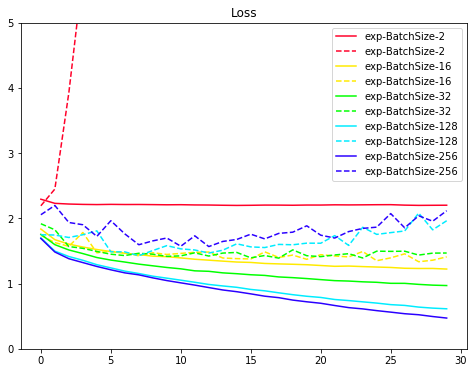

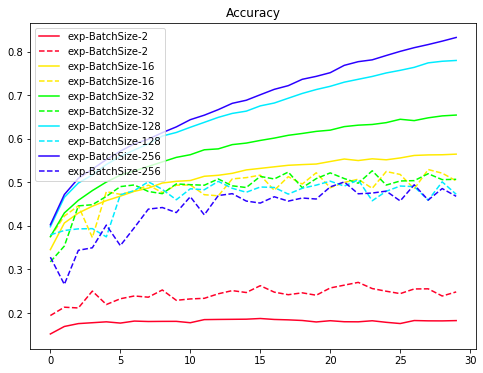

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
### 